<a href="https://colab.research.google.com/github/Kiruthigabalasubramani/Retail-store-sales-prediction/blob/main/notebook/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/grocery_store_sales.csv')
df.head()


,customer_id,store_name,transaction_date,aisle,product_name,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points
0,2824,GreenGrocer Plaza,8/26/2023,Produce,Pasta,2,7.46,14.92,0.00,14.92,377
1,5506,ValuePlus Market,2/13/2024,Dairy,Cheese,1,1.85,1.85,3.41,-1.56,111
2,4657,ValuePlus Market,11/23/2023,Bakery,Onions,4,7.38,29.52,4.04,25.48,301
3,2679,SuperSave Central,1/13/2025,Snacks & Candy,Cereal,3,5.50,16.50,1.37,15.13,490
4,9935,GreenGrocer Plaza,10/13/2023,Canned Goods,Orange Juice,5,8.66,43.30,1.50,41.80,22


In [8]:
# Dataset overview
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())
print("\nSales (final_amount) stats:\n", df['final_amount'].describe())


Shape: (1980, 11)

Columns: Index(['customer_id', 'store_name', 'transaction_date', 'aisle',
       'product_name', 'quantity', 'unit_price', 'total_amount',
       'discount_amount', 'final_amount', 'loyalty_points'],
      dtype='object')

Missing values:
 customer_id          0
store_name          25
transaction_date     0
aisle                0
product_name         0
quantity             0
unit_price           0
total_amount         0
discount_amount      0
final_amount         0
loyalty_points       0
dtype: int64

Sales (final_amount) stats:
 count    1980.000000
mean       41.432985
std        32.593328
min        -3.430000
25%        15.800000
50%        32.820000
75%        60.800000
max       147.910000
Name: final_amount, dtype: float64


In [10]:
# Handle missing store_name
df['store_name'] = df['store_name'].fillna('Unknown')

# Verify missing values again
df.isnull().sum()


,0
customer_id,0
store_name,0
transaction_date,0
aisle,0
product_name,0
quantity,0
unit_price,0
total_amount,0
discount_amount,0
final_amount,0


In [12]:
# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract useful date features
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day

df[['transaction_date', 'year', 'month', 'day']].head()


,transaction_date,year,month,day
0,2023-08-26,2023,8,26
1,2024-02-13,2024,2,13
2,2023-11-23,2023,11,23
3,2025-01-13,2025,1,13
4,2023-10-13,2023,10,13


In [14]:
# Select features and target
X = df[['quantity', 'unit_price', 'discount_amount',
        'loyalty_points', 'year', 'month', 'day']]

y = df['final_amount']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1980, 7)
Target shape: (1980,)


In [16]:
from sklearn.model_selection import train_test_split

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (1584, 7)
Testing data size: (396, 7)


In [18]:
from sklearn.linear_model import LinearRegression

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Linear Regression model trained successfully")


Linear Regression model trained successfully


In [20]:
# Predict sales on test data
y_pred = lr_model.predict(X_test)

# Compare actual vs predicted (first 5)
comparison = pd.DataFrame({
    'Actual Sales': y_test.values[:5],
    'Predicted Sales': y_pred[:5]
})

comparison


,Actual Sales,Predicted Sales
0,1.41,3.455018
1,33.35,37.720952
2,20.13,19.072062
3,57.86,61.731158
4,12.10,3.344678


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)


Mean Absolute Error (MAE): 8.609111772829948
Root Mean Squared Error (RMSE): 11.488188732785352
R2 Score: 0.8706447406099059


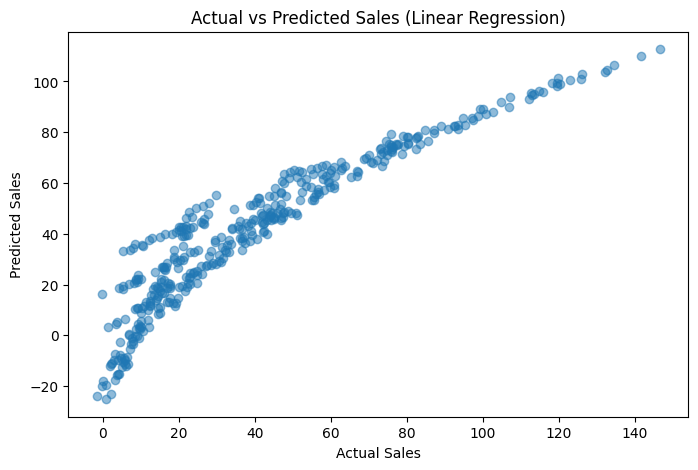

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Linear Regression)")
plt.show()
